# Making publication-quality figures in Python

---

## Should be:

(1) __Correctly fitted to page__
* One column or two?
* Publication vs. poster vs. slide presentation?
  
(2) __Font size consistent, legible, sans serif__
* Even math formatting!... add `mp.rcParams.update({'mathtext.default': 'regular'})` to import statements

(3) __Axes are clear with unobtrusive labels__
* Labels only if necessary

(4) __Colors are (as) intuitive (as possible)__
* E.g., positive precip. change shown with cool colors, negative with warm
* Color bars are discrete without too many gradations

(5) __Units, legends, keys, figure labels are self-explanatory__

(7) __Final cleanup:  Figures are flush, legends/colorbars well-placed, figure is saved properly__

---

# (0) Import data

Import some data to work with.  Let's take oceanic indices from NCEP:  
http://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import xarray
import pandas
import datetime
import cartopy

plt.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

Open SST index info

In [2]:
filename = '../data-files/sstoi.indices'
sst_indices_df = pandas.read_table(filename, delim_whitespace=True)

print(sst_indices_df.head())
print(sst_indices_df.tail())

     YR  MON  NINO1+2  ANOM  NINO3  ANOM.1  NINO4  ANOM.2  NINO3.4  ANOM.3
0  1982    1    24.29 -0.17  25.87    0.24  28.30    0.00    26.72    0.15
1  1982    2    25.49 -0.58  26.38    0.01  28.21    0.11    26.70   -0.02
2  1982    3    25.21 -1.31  26.98   -0.16  28.41    0.22    27.20   -0.02
3  1982    4    24.50 -0.97  27.68    0.18  28.92    0.42    28.02    0.24
4  1982    5    23.97 -0.23  27.79    0.71  29.49    0.70    28.54    0.69
       YR  MON  NINO1+2  ANOM  NINO3  ANOM.1  NINO4  ANOM.2  NINO3.4  ANOM.3
434  2018    3    25.83 -0.80  26.37   -0.76  28.14   -0.05    26.48   -0.73
435  2018    4    24.58 -1.02  27.12   -0.38  28.63    0.12    27.42   -0.36
436  2018    5    23.73 -0.54  26.94   -0.15  29.01    0.22    27.72   -0.13
437  2018    6    22.19 -0.69  26.72    0.29  29.16    0.32    27.85    0.20
438  2018    7    21.43 -0.19  26.05    0.43  29.10    0.30    27.52    0.30


In [3]:
years = sst_indices_df['YR'].values
months = sst_indices_df['MON'].values
nino12 = sst_indices_df['NINO1+2'].values
nino3 = sst_indices_df['NINO3'].values
nino34 = sst_indices_df['NINO3.4'].values
nino4 = sst_indices_df['NINO4'].values

nino_datetimes = [datetime.datetime(y,m,15) for y,m in zip(years,months)]

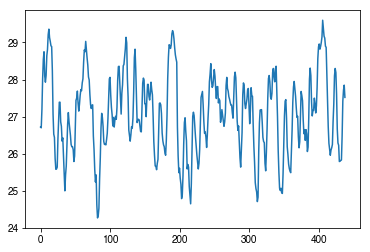

In [4]:
plt.plot(nino34)

Open precipitation info, calculate DJF means

In [5]:
precip_file = xarray.open_dataset('../data-files/precip.mon.mean.nc')

precip_lat = precip_file['lat'].values
precip_lon = precip_file['lon'].values

# select and take mean of ONLY 1997-1998 DJF
precip_9798_djf = precip_file['precip'].sel(time=slice(datetime.datetime(1997,12,1), \
                                                  datetime.datetime(1998,2,28))).values
precip_9798_djf_mean = np.mean(precip_9798_djf, axis=0)

# also pull out ALL DJF values and take mean
djf_truefalse = precip_file['time.season'].values=='DJF'
precip_all_djf = precip_file['precip'].sel(time=djf_truefalse).values
precip_all_djf_mean = np.mean(precip_all_djf, axis=0)

precip_9798_anomaly = precip_9798_djf_mean - precip_all_djf_mean

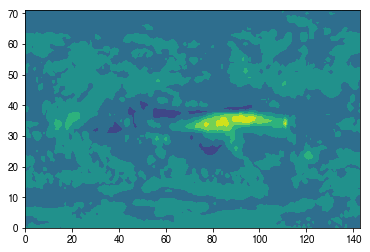

In [6]:
plt.contourf(precip_9798_anomaly)

---

Start with a basic panel plot

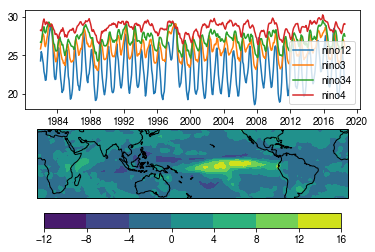

In [7]:
map_crs = cartopy.crs.PlateCarree(central_longitude=180)
data_crs = cartopy.crs.PlateCarree(central_longitude=0)

fig = plt.figure()

ax1 = fig.add_subplot(211)

ax1.plot(nino_datetimes, nino12, label='nino12')
ax1.plot(nino_datetimes, nino3, label='nino3')
ax1.plot(nino_datetimes, nino34, label='nino34')
ax1.plot(nino_datetimes, nino4, label='nino4')
ax1.legend()

ax2 = fig.add_subplot(212, projection=map_crs)
ax2_plot = ax2.contourf(precip_lon, precip_lat, precip_9798_anomaly, transform=data_crs)
ax2.coastlines()
ax2.set_extent([0.001,359.999,-40,40])
cbar = plt.colorbar(ax2_plot, orientation='horizontal')

# (1) Controlling figure size

Add `figsize=(width,height)` within the `figure()` command
* For a full-page figure, use a width between 6.5 and 8.5 in
* For a single-column figure, use a width between 3.25 and 4.25

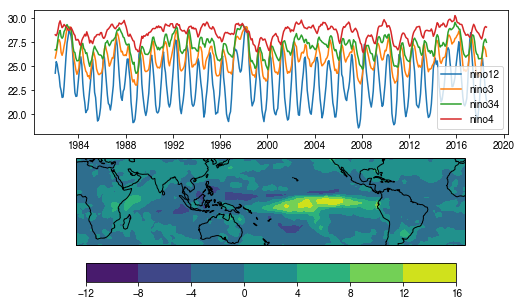

In [8]:
map_crs = cartopy.crs.PlateCarree(central_longitude=180)
data_crs = cartopy.crs.PlateCarree(central_longitude=0)

fig = plt.figure(figsize=(8.5,5))

ax1 = fig.add_subplot(211)
ax1.plot(nino_datetimes, nino12, label='nino12')
ax1.plot(nino_datetimes, nino3, label='nino3')
ax1.plot(nino_datetimes, nino34, label='nino34')
ax1.plot(nino_datetimes, nino4, label='nino4')
ax1.legend()

ax2 = fig.add_subplot(212, projection=map_crs)
ax2_plot = ax2.contourf(precip_lon, precip_lat, precip_9798_anomaly, transform=data_crs)
ax2.coastlines()
ax2.set_extent([0.001,359.999,-40,40])
cbar = plt.colorbar(ax2_plot, orientation='horizontal')

# (2) Font legible, consistent, sans serif

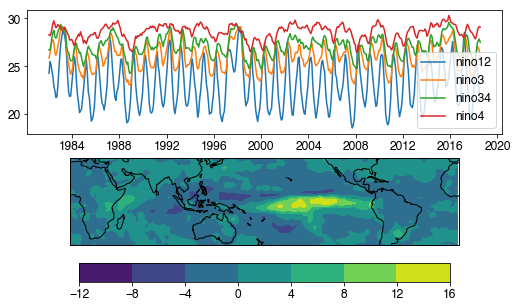

In [9]:
my_fontsize=12

map_crs = cartopy.crs.PlateCarree(central_longitude=180)
data_crs = cartopy.crs.PlateCarree(central_longitude=0)

fig = plt.figure(figsize=(8.5,5))

ax1 = fig.add_subplot(211)
ax1.plot(nino_datetimes, nino12, label='nino12')
ax1.plot(nino_datetimes, nino3, label='nino3')
ax1.plot(nino_datetimes, nino34, label='nino34')
ax1.plot(nino_datetimes, nino4, label='nino4')
ax1.legend(fontsize=my_fontsize)
ax1.tick_params(labelsize=my_fontsize)

ax2 = fig.add_subplot(212, projection=map_crs)
ax2_plot = ax2.contourf(precip_lon, precip_lat, precip_9798_anomaly, transform=data_crs)
ax2.coastlines()
ax2.set_extent([0.001,359.999,-40,40])
cbar = plt.colorbar(ax2_plot, orientation='horizontal')
cbar.ax.tick_params(labelsize=my_fontsize)

# (3) Axes are clear with unobtrusive labels

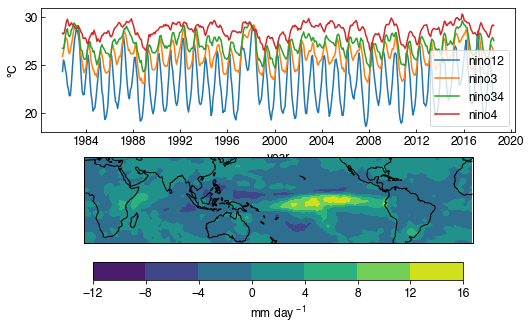

In [10]:
my_fontsize=12

map_crs = cartopy.crs.PlateCarree(central_longitude=180)
data_crs = cartopy.crs.PlateCarree(central_longitude=0)

fig = plt.figure(figsize=(8.5,5))

ax1 = fig.add_subplot(211)
ax1.plot(nino_datetimes, nino12, label='nino12')
ax1.plot(nino_datetimes, nino3, label='nino3')
ax1.plot(nino_datetimes, nino34, label='nino34')
ax1.plot(nino_datetimes, nino4, label='nino4')
ax1.legend(fontsize=my_fontsize)
ax1.tick_params(labelsize=my_fontsize, direction='in')
ax1.set_xlabel('year', fontsize=my_fontsize)
ax1.set_ylabel('$\degree$C', fontsize=my_fontsize)

my_fontsize=12

map_crs = cartopy.crs.PlateCarree(central_longitude=180)
data_crs = cartopy.crs.PlateCarree(central_longitude=0)

ax2 = fig.add_subplot(212, projection=map_crs)
ax2_plot = ax2.contourf(precip_lon, precip_lat, precip_9798_anomaly, \
                        transform=data_crs)
ax2.coastlines()
ax2.set_extent([0.001,359.999,-40,40])
cbar = plt.colorbar(ax2_plot, orientation='horizontal')
cbar.ax.tick_params(labelsize=my_fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=my_fontsize)

# (4) Colormaps are (as) intuitive (as possible)

## ... and colorblind friendly, too

For example, let's order the Niño indices from west (lightest) to east (darkest).  Use a matplotlib colormap for this, and use the capability of choosing a value normalized from 0 to 1:

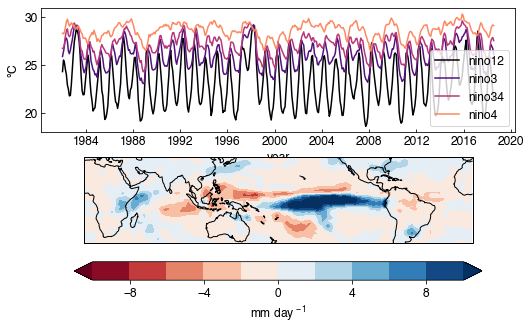

In [11]:
my_fontsize=12

map_crs = cartopy.crs.PlateCarree(central_longitude=180)
data_crs = cartopy.crs.PlateCarree(central_longitude=0)

fig = plt.figure(figsize=(8.5,5))

ax1 = fig.add_subplot(211)
ax1.plot(nino_datetimes, nino12, label='nino12', color=mcm.magma(0))
ax1.plot(nino_datetimes, nino3, label='nino3', color=mcm.magma(0.25))
ax1.plot(nino_datetimes, nino34, label='nino34', color=mcm.magma(0.5))
ax1.plot(nino_datetimes, nino4, label='nino4', color=mcm.magma(0.75))
ax1.legend(fontsize=my_fontsize)
ax1.tick_params(labelsize=my_fontsize, direction='in')
ax1.set_xlabel('year', fontsize=my_fontsize)
ax1.set_ylabel('$\degree$C', fontsize=my_fontsize)

ax2 = fig.add_subplot(212, projection=map_crs)
ax2_plot = ax2.contourf(precip_lon, precip_lat, precip_9798_anomaly, \
                        transform=data_crs, levels=np.arange(-10,10.1,2), \
                        extend='both', cmap='RdBu')
ax2.coastlines()
ax2.set_extent([0.001,359.999,-40,40])
cbar = plt.colorbar(ax2_plot, orientation='horizontal')
cbar.ax.tick_params(labelsize=my_fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=my_fontsize)

# (5) Units, legends, keys, figure labels are self-explanatory

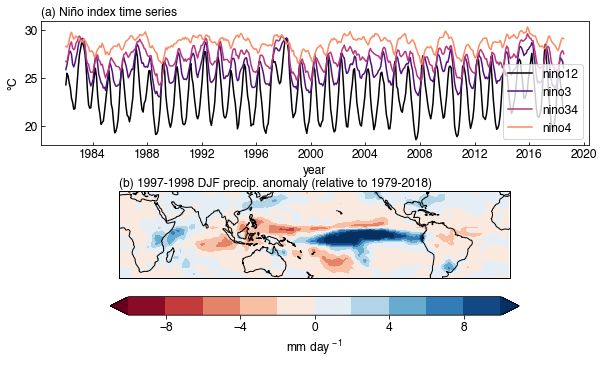

In [12]:
my_fontsize=12

map_crs = cartopy.crs.PlateCarree(central_longitude=180)
data_crs = cartopy.crs.PlateCarree(central_longitude=0)

fig = plt.figure(figsize=(8.5,5))

ax1 = fig.add_subplot(211)
ax1.plot(nino_datetimes, nino12, label='nino12', color=mcm.magma(0))
ax1.plot(nino_datetimes, nino3, label='nino3', color=mcm.magma(0.25))
ax1.plot(nino_datetimes, nino34, label='nino34', color=mcm.magma(0.5))
ax1.plot(nino_datetimes, nino4, label='nino4', color=mcm.magma(0.75))
ax1.legend(fontsize=my_fontsize)
ax1.tick_params(labelsize=my_fontsize, direction='in')
ax1.set_xlabel('year', fontsize=my_fontsize)
ax1.set_ylabel('$\degree$C', fontsize=my_fontsize)

ax2 = fig.add_subplot(212, projection=map_crs)
ax2_plot = ax2.contourf(precip_lon, precip_lat, precip_9798_anomaly, \
                        transform=data_crs, levels=np.arange(-10,10.1,2), \
                        extend='both', cmap='RdBu')
ax2.coastlines()
ax2.set_extent([0.001,359.999,-40,40])
cbar = plt.colorbar(ax2_plot, orientation='horizontal')
cbar.ax.tick_params(labelsize=my_fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=my_fontsize)

ax1.text(s='(a) Niño index time series', x=0, y=1.02, \
         transform=ax1.transAxes, ha='left', va='bottom', fontsize=my_fontsize)
ax2.text(s='(b) 1997-1998 DJF precip. anomaly (relative to 1979-2018)', x=0, y=1.02, \
         transform=ax2.transAxes, ha='left', va='bottom', fontsize=my_fontsize)

fig.tight_layout()

# (6) Final cleanup:  Figures are flush, legends/colorbars well-placed, figure is saved properly

* Create a color bar axis separately for more controlled placement
* Move the legend outside of figure, get rid of box

In [13]:
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_visible(False)  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

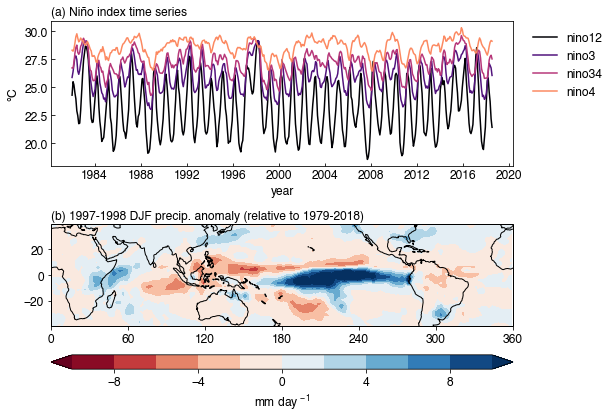

In [14]:
my_fontsize=12
# ===== set up projections for bottom axis
map_crs = cartopy.crs.PlateCarree(central_longitude=180)
data_crs = cartopy.crs.PlateCarree(central_longitude=0)
# ===== create figure
fig = plt.figure(figsize=(8.5,5))

# ===== create first axes
ax1 = fig.add_subplot(211)
ax1.plot(nino_datetimes, nino12, label='nino12', color=mcm.magma(0))
ax1.plot(nino_datetimes, nino3, label='nino3', color=mcm.magma(0.25))
ax1.plot(nino_datetimes, nino34, label='nino34', color=mcm.magma(0.5))
ax1.plot(nino_datetimes, nino4, label='nino4', color=mcm.magma(0.75))
# ===== create legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, fancybox=False, edgecolor='None', facecolor='None',\
           bbox_to_anchor=(1.02,1), loc='upper left', fontsize=my_fontsize)
# ===== adjust axis fonts and labels; make ticks go inward
ax1.tick_params(labelsize=my_fontsize, direction='in')
ax1.set_xlabel('year', fontsize=my_fontsize)
ax1.set_ylabel('$\degree$C', fontsize=my_fontsize)

# ===== change spine behavior
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax1.spines['left'].set_position(('axes', -0.025))
# ax1.spines['bottom'].set_position(('axes', -0.025))
# ax1.spines['left'].set_bounds(20,30)
# ax1.set_xticks([datetime.datetime(y,1,15) for y in range(1980,2021,5)])
# ax1.set_xlim(datetime.datetime(1980,1,15), datetime.datetime(2020,1,15))

# ===== create second axes
ax2 = fig.add_subplot(212, projection=map_crs)
ax2_plot = ax2.contourf(precip_lon, precip_lat, precip_9798_anomaly, \
                        transform=data_crs, levels=np.arange(-10,10.1,2), \
                        extend='both', cmap='RdBu')
ax2.coastlines()
ax2.set_extent([0.001,359.999,-40,40])
ax2.set_xticks(np.arange(-180,181,60))
ax2.set_xticklabels([i+180 for i in ax2.get_xticks()])
ax2.set_yticks([-20,0,20])
ax2.tick_params(labelsize=my_fontsize)

# ===== add text to axes
ax1.text(s='(a) Niño index time series', x=0, y=1.02, \
         transform=ax1.transAxes, ha='left', va='bottom', fontsize=my_fontsize)
ax2.text(s='(b) 1997-1998 DJF precip. anomaly (relative to 1979-2018)', x=0, y=1.02, \
         transform=ax2.transAxes, ha='left', va='bottom', fontsize=my_fontsize)
# ===== spread figures out to fill canvas
fig.tight_layout()

# ===== add color bar at end
ax2pos = ax2.get_position()
cbar_ax = fig.add_axes([ax2pos.x0,ax2pos.y0-.06,ax2pos.width,0.04])
cbar = plt.colorbar(ax2_plot, orientation='horizontal', cax=cbar_ax)
cbar.ax.tick_params(labelsize=my_fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=my_fontsize)

fig.savefig('../figures/4-publication-quality-example.pdf', bbox_inches='tight', transparent=True)

Note:  Maps can be hard to work with and line up correctly.  
Use `ax.set_aspect('auto')` when all else fails.